In [8]:
import pandas as pd
data = pd.read_excel(r"D:\DKATUBES\2023-2024 NBA Player Stats - Playoffs.xlsx")

In [9]:
data[["Player","GP","3P", "3PA", "3P%", "eFG%","Label"]].head()

,Player,GP,3P,3PA,3P%,eFG%,Label
0,Damian Lillard,4,5.0,12.0,0.417,0.543,1
1,Luka Doncic,22,3.1,9.6,0.322,0.514,1
2,Tyrese Haliburton,15,3.5,9.3,0.379,0.612,1
3,Tyrese Maxey,6,3.7,9.2,0.400,0.558,1
4,D'Angelo Russell,5,2.8,8.8,0.318,0.479,1


In [10]:
data["Label"].value_counts()

Label
0    135
1     79
Name: count, dtype: int64

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = data.drop(columns=["Player"])

X = data.drop(columns=["Label"])
y = data["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Presisi:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8837209302325582
Presisi: 0.8235294117647058
Recall: 0.875
F1: 0.8484848484848485

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.82      0.88      0.85        16

    accuracy                           0.88        43
   macro avg       0.87      0.88      0.88        43
weighted avg       0.89      0.88      0.88        43



In [12]:
from sklearn.tree import export_text

decision_rules = export_text(dt_model, feature_names=X.columns.tolist())
print(decision_rules)


|--- 3P <= 0.65
|   |--- GP <= 18.00
|   |   |--- class: 0
|   |--- GP >  18.00
|   |   |--- 3PA <= 1.20
|   |   |   |--- class: 0
|   |   |--- 3PA >  1.20
|   |   |   |--- class: 1
|--- 3P >  0.65
|   |--- GP <= 4.50
|   |   |--- 3P <= 2.15
|   |   |   |--- class: 0
|   |   |--- 3P >  2.15
|   |   |   |--- class: 1
|   |--- GP >  4.50
|   |   |--- eFG% <= 0.41
|   |   |   |--- class: 0
|   |   |--- eFG% >  0.41
|   |   |   |--- eFG% <= 0.48
|   |   |   |   |--- GP <= 9.50
|   |   |   |   |   |--- eFG% <= 0.46
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- eFG% >  0.46
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- GP >  9.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- eFG% >  0.48
|   |   |   |   |--- GP <= 5.50
|   |   |   |   |   |--- 3P% <= 0.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 3P% >  0.43
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- GP >  5.50
|   |   |   |   |   |--- class: 1



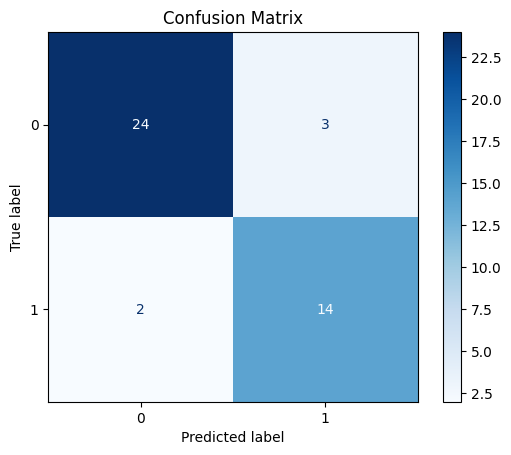

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
